In [1]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('userbehaviour.csv')
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [4]:
data['Status'].value_counts()

Status
Installed      916
Uninstalled     83
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [6]:
# encode status as 0 if uninstall and 1 if active
data['Status'] = data['Status'].map({'Uninstalled': 1, 'Installed': 0}) # since uninstalled indicates churning!
data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,0
1,1002,0.0,54.0,0,4,8,24008,1
2,1003,37.0,207.0,0,8,5,971,0
3,1004,32.0,445.0,1,6,2,799,0
4,1005,45.0,427.0,1,5,6,3668,0


In [7]:
df=data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

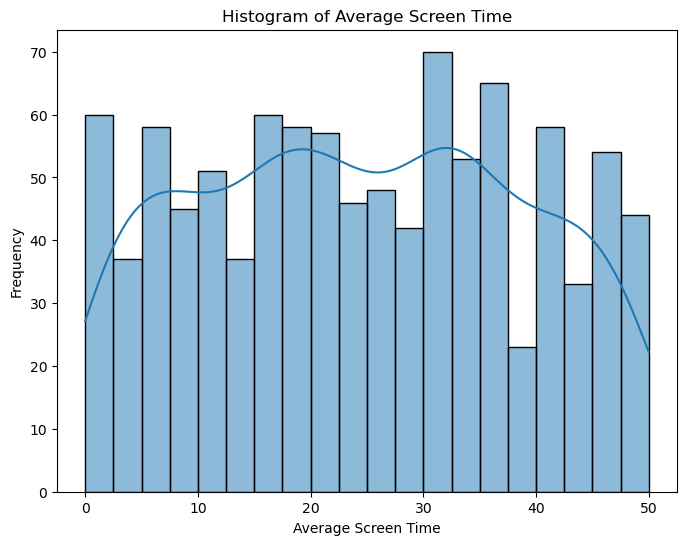

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'Average Screen Time'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Average Screen Time', bins=20, kde=True,color=colors[0])
plt.title('Histogram of Average Screen Time')
plt.xlabel('Average Screen Time')
plt.ylabel('Frequency')
plt.show()


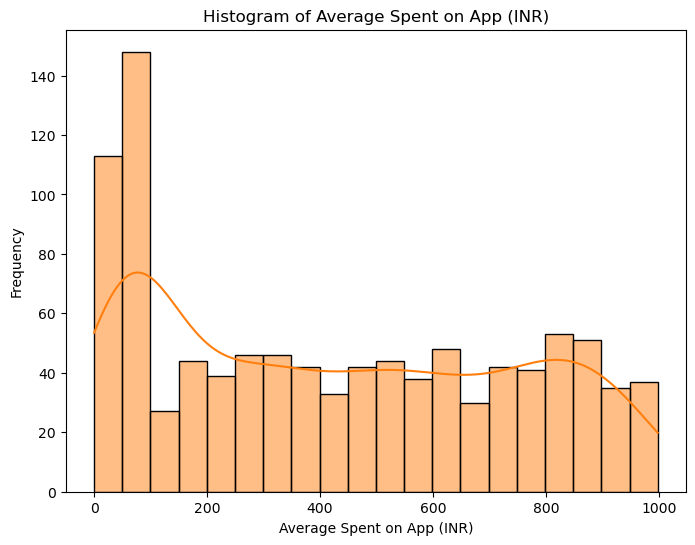

In [9]:

# Plot histogram for 'Average Spent on App (INR)'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Average Spent on App (INR)', bins=20, kde=True,color=colors[1])
plt.title('Histogram of Average Spent on App (INR)')
plt.xlabel('Average Spent on App (INR)')
plt.ylabel('Frequency')
plt.show()


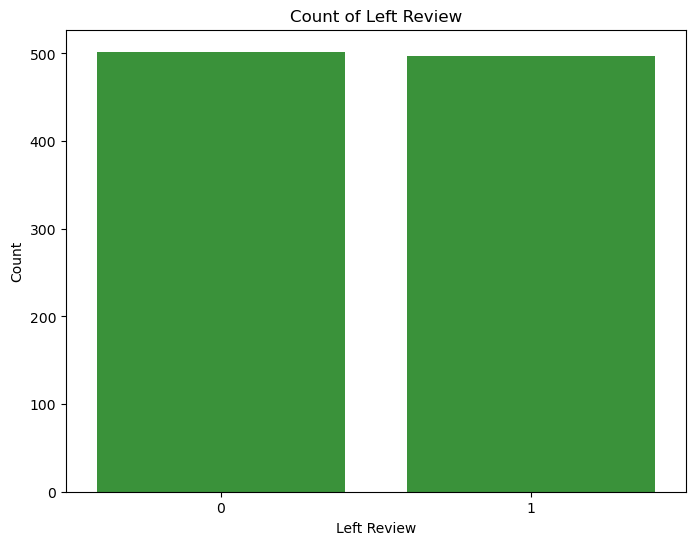

In [10]:

# Plot count plot for 'Left Review'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Left Review',color=colors[2])
plt.title('Count of Left Review')
plt.xlabel('Left Review')
plt.ylabel('Count')
plt.show()


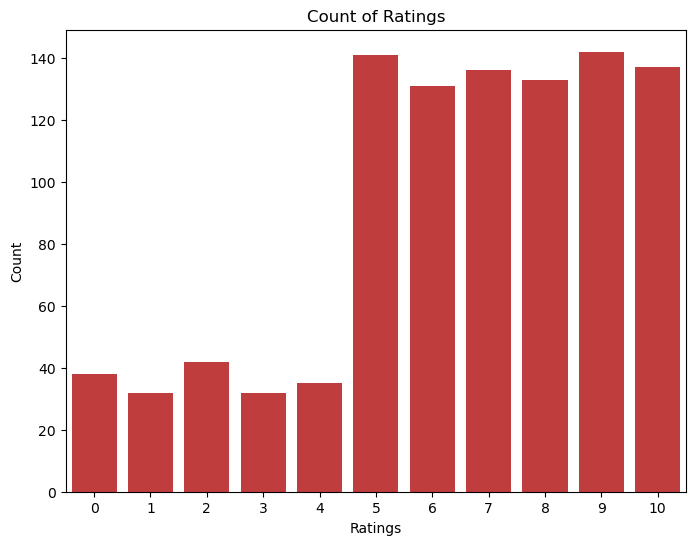

In [11]:

# Plot count plot for 'Ratings'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Ratings',color=colors[3])
plt.title('Count of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


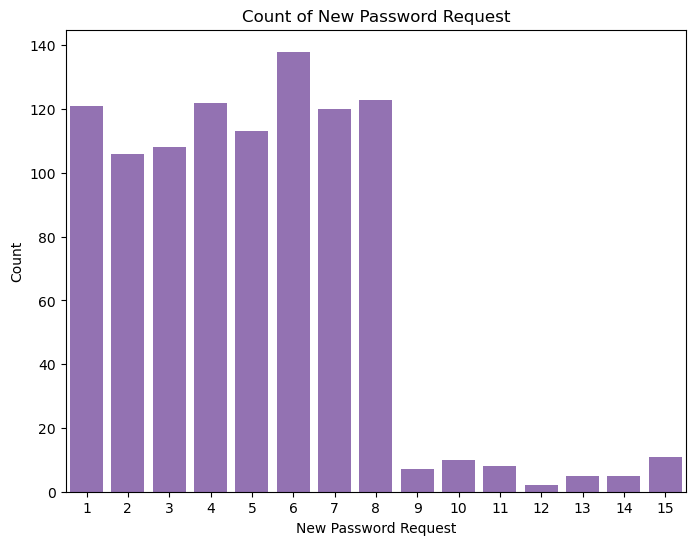

In [12]:

# Plot count plot for 'New Password Request'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='New Password Request',color=colors[4])
plt.title('Count of New Password Request')
plt.xlabel('New Password Request')
plt.ylabel('Count')
plt.show()


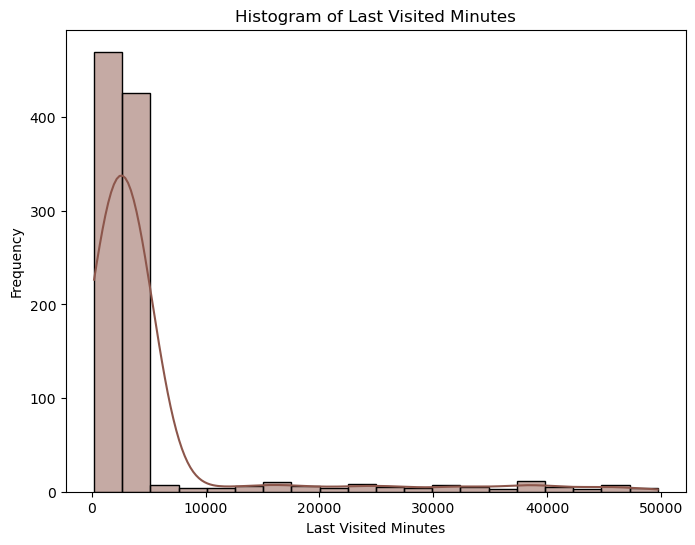

In [13]:

# Plot histogram for 'Last Visited Minutes'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Last Visited Minutes', bins=20, kde=True,color=colors[5])
plt.title('Histogram of Last Visited Minutes')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Frequency')
plt.show()


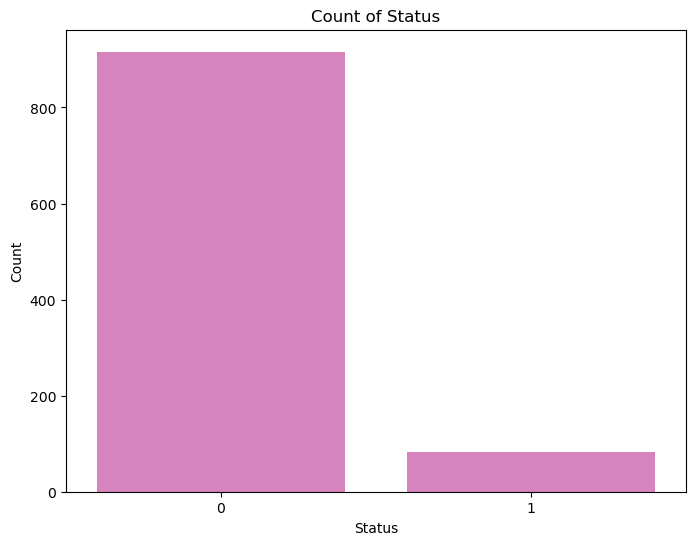

In [14]:

# Plot count plot for 'Status'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status',color=colors[6])
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



In [15]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
figure.show()

In [16]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show()

In [17]:
clustering_data = data[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
data["Segments"] = clusters


In [18]:
print(data["Segments"].value_counts())

Segments
0    910
2     45
1     44
Name: count, dtype: int64


In [19]:
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

In [20]:
# save the data
data.to_csv('final_data.csv', index=False)

In [21]:
PLOT = go.Figure()
for i in list(data["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = data[data["Segments"]== i]['Last Visited Minutes'],
                                y = data[data["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', titlefont_color = 'black')))

# model training

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

data=pd.read_csv('final_data.csv')

# Define independent variables (X) and target variable (y)
X = data[['Average Screen Time', 'Average Spent on App (INR)', 'Left Review', 'Ratings', 'New Password Request', 'Last Visited Minutes','Status']]
y = data['Segments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#apply smote on train
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\roshg\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\roshg\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [25]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
joblib.dump(model, 'trained_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9937421777221527
Testing Accuracy: 0.99


# app code final?


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go

# Load your data
# Replace 'data.csv' with the path to your CSV file
data = pd.read_csv('final_data.csv')

# Function to plot EDA
def plot_eda():
    # Plot histogram for 'Average Screen Time'
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Average Screen Time', bins=20, kde=True)
    plt.title('Histogram of Average Screen Time')
    plt.xlabel('Average Screen Time')
    plt.ylabel('Frequency')
    st.pyplot()

    # Plot histogram for 'Average Spent on App (INR)'
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Average Spent on App (INR)', bins=20, kde=True)
    plt.title('Histogram of Average Spent on App (INR)')
    plt.xlabel('Average Spent on App (INR)')
    plt.ylabel('Frequency')
    st.pyplot()

    # Plot count plot for 'Left Review'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Left Review')
    plt.title('Count of Left Review')
    plt.xlabel('Left Review')
    plt.ylabel('Count')
    st.pyplot()

    # Plot count plot for 'Ratings'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Ratings')
    plt.title('Count of Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    st.pyplot()

    # Plot count plot for 'New Password Request'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='New Password Request')
    plt.title('Count of New Password Request')
    plt.xlabel('New Password Request')
    plt.ylabel('Count')
    st.pyplot()

    # Plot histogram for 'Last Visited Minutes'
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Last Visited Minutes', bins=20, kde=True)
    plt.title('Histogram of Last Visited Minutes')
    plt.xlabel('Last Visited Minutes')
    plt.ylabel('Frequency')
    st.pyplot()

    # Plot count plot for 'Status'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Status')
    plt.title('Count of Status')
    plt.xlabel('Status')
    plt.ylabel('Count')
    st.pyplot()
    
    fig = go.Figure()
    for segment in data["Segments"].unique():
        fig.add_trace(go.Scatter(x=data[data["Segments"]==segment]['Last Visited Minutes'],
                                  y=data[data["Segments"]==segment]['Average Spent on App (INR)'],
                                  mode='markers',
                                  marker=dict(size=6, line_width=1),
                                  name=str(segment)))
    
    fig.update_layout(width=800, height=800, autosize=True, showlegend=True,
                      yaxis_title='Average Spent on App (INR)',
                      xaxis_title='Last Visited Minutes',
                      hovermode='closest')
    
    fig.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')
    
    st.plotly_chart(fig)
    
    fig = px.scatter(data_frame=data, 
                     x="Average Screen Time",
                     y="Ratings",
                     size="Ratings",
                     color="Status",
                     title="Relationship Between Ratings and Screen Time",
                     trendline="ols")
    
    st.plotly_chart(fig)
    
    fig = px.scatter(data_frame=data, 
                     x="Average Screen Time",
                     y="Average Spent on App (INR)",
                     size="Average Spent on App (INR)",
                     color="Status",
                     title="Relationship Between Spending Capacity and Screen Time",
                     trendline="ols")
    
    st.plotly_chart(fig)

# Streamlit app
st.title('Customer Churn Prediction')

# Add tabs for Prediction and EDA
tabs = st.sidebar.radio("Navigation", ["Prediction", "EDA"])

# Prediction tab
if tabs == "Prediction":
    import streamlit as st
    import pandas as pd
    import joblib
    from sklearn.preprocessing import StandardScaler
    model = joblib.load('trained_model.joblib')
    scaler = joblib.load('scaler.joblib')
    # Function to predict churn status
    def predict_churn(average_screen_time, average_spent_on_app, left_review, ratings, new_password_request, last_visited_minutes,Installation_Status ):
        # Scale the input values
        
        input_values = scaler.transform([[average_screen_time, average_spent_on_app, left_review, ratings, new_password_request, last_visited_minutes,Installation_Status]])
        # Predict churn status
        prediction = model.predict(input_values)
        return prediction[0]

    # Streamlit app
    st.title('Customer Churn Prediction')

    # Input values for independent variables
    average_screen_time = st.number_input('Average Screen Time', value=0.0)
    average_spent_on_app = st.number_input('Average Spent on App (INR)', value=0.0)
    left_review = st.selectbox('Left Review', [0, 1])
    ratings = st.slider('Ratings', min_value=0, max_value=5, value=0)
    new_password_request = st.selectbox('New Password Request', [0, 1])
    last_visited_minutes = st.number_input('Last Visited Minutes', value=0.0)
    Installation_Status = st.selectbox('Installation Status', [0, 1])

    # Predict churn status
    if st.button('Predict'):
        prediction = predict_churn(average_screen_time, average_spent_on_app, left_review, ratings, new_password_request, last_visited_minutes,Installation_Status)
        st.write('Churn Status:', prediction)

# EDA tab
elif tabs == "EDA":
    plot_eda()
